# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смена рабочей директории.

In [1]:
import os
os.chdir('C:/Users/koros/2023-Korostin-TimeSeriesCourse-main/practice/04 Matrix profile')

Использование команд, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

Для выполнения данной практической работы используйте библиотеку *stumpy*, предназначенную для анализа временных рядов на основе матричного профиля.

Установите библиотеку *stumpy*.

In [3]:
!pip install stumpy

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

Импорт библиотек и модулей.

In [4]:
import pandas as pd
import numpy as np

from modules.plots import *
from modules.mp import *
from modules.motifs import *
from modules.discords import *

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [5]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [6]:
plot_ts(ts, "Input time series")

Изучите [документацию](https://stumpy.readthedocs.io/en/latest/index.html) библиотеки *stumpy*. Напишите функцию `calculate_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [7]:
m = 165
exclusion_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts, m, exclusion_zone)

Визуализируйте найденный матричный профиль временного ряда.

In [8]:
plot_ts(mp['mp'], "Matrix Profile")

### **Задача 2.**
Найдите top-$k$ мотивов во временном ряде на основе построенного матричного профиля.

In [9]:
top_k = 6
motifs = {}

top_k_idxs = stumpy.motifs(ts, mp['mp'], max_matches=top_k)[1][0]

motifs['indices'] = [sorted([top_k_idxs[i], top_k_idxs[i+1]]) for i in range(0, len(top_k_idxs)-1, 2)]

In [10]:
motifs['indices']

[[17852, 18188], [26757, 26925], [9115, 18020]]

Выполните визуализацию найденных top-$k$ мотивов.

In [11]:
plot_motifs(mp, motifs)

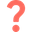
Проанализируйте и изложите содержательный смысл полученных результатов.

**С помощью вычисленного матричного профиля можно найти топ-к мотивов ряда.**

### **Задача 3.**
Найдите top-$k$ диссонансов во временном ряде на основе матричного профиля.

Для решения данной задачи загрузите временной ряд, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [12]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()

In [13]:
plot_ts(ts, "Input time series")

Найдите матричный профиль и на его основе top-$k$ диссонансы.

In [14]:
m = 96
exclusion_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts.astype(np.float64), m, exclusion_zone)

In [15]:
np.array([])

array([], dtype=float64)

In [16]:
np.argsort(mp['mp'])

array([2636, 2300, 2662, ..., 9984, 9986, 9985], dtype=int64)

In [17]:
top_k = 15
discords = {}

top_k_idxs = []
argsort_mp = np.argsort(mp['mp'])
for i in range(1, len(argsort_mp)+1):
    idx = argsort_mp[-i]
    flag = True
    for top_k_idx in top_k_idxs:
        if abs(top_k_idx - idx) < exclusion_zone:
            flag = False
    if flag:
        top_k_idxs.append(idx)
    if len(top_k_idxs) == top_k:
        break
        
print(top_k_idxs)

discords['indices'] = top_k_idxs

[9985, 10048, 8784, 10097, 8837, 5868, 105, 9651, 8449, 5954, 7107, 154, 8396, 8640, 2930]


Выполните визуализацию найденных top-$k$ диссонансов.

In [18]:
plot_discords(mp, discords)

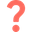
Проанализируйте и изложите содержательный смысл полученных результатов.

**С помощью вычисленного матричного профиля можно найти топ-к диссонансов ряда.**